# IT8302 CA1 - PART B: REGRESSION (50 marks)

This notebook was created to fulil the requirements of the **IT8302 CA1** submission for the Singapore Polytechnic *Specialist Diploma in Data Science (Artificial Intelligence)*

This part of the assignment is to be completed individually. 

## Background
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.


## Dataset
You are to use the dataset.
[https://www.kaggle.com/harlfoxem/housesalesprediction](https://www.kaggle.com/harlfoxem/housesalesprediction)


## Tasks
1.	Write the code to solve the prediction task. Normally you would be using scikit-learn, but if you'd prefer to work with your own implementation of learning algorithms, or some other toolkit, that is fine.
2.	Write a report detailing your implementation, your experiments and analysis in the Jupyter notebook (along with your python code and comments). In particular, we'd like to know:

 - How is your prediction task defined? And what is the meaning of the output variable?
 - How do you represent your data as features?
 - Did you process the features in any way?
 - Did you bring in any additional sources of data?
 - How did you select which learning algorithms to use?
 - Did you try to tune the hyperparameters of the learning algorithm, and in that case how?
 - How do you evaluate the quality of your system?
 - How well does your system compare to a stupid baseline?
 - Can you say anything about the errors that the system makes?
 - Is it possible to something about which features the model considers important? say
 

3.	Create a set of slides with the highlights of your Jupyter notebook report. Explain the entire machine learning process you went through, data exploration, data cleaning, feature engineering, and model building and evaluation. Write your conclusions.

## Submission requirements

1.	Submit a zip file containing all the project files (Jupyter notebook), all data sets used, Kaggle test score screenshot and the slides (PPTX or pdf).
2.	Submit online via the Assignment link.

|Evaluation criteria:|Weightage|
|---|---|
|Application of suitable algorithms|20%|
|Suitable evaluation of algorithms|20%|
|Background research|20%|
|Presentation/Demo|20%|
|Quality of report (Jupyter)|20%|

----

# Preamble

Again, we refer to the frame work set forth in Lecture 1.

![title](Machine_Learning_Workflow.jpg)

We also import our usual libraries

In [1]:
import warnings
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import sklearn
import seaborn as sns
import platform
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline


message = "        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Python version={}".format(platform.python_version()))

warnings.filterwarnings('ignore')

************************
        Versions        
************************
Scikit-learn version=0.21.3
Numpy version=1.17.4
Pandas version=0.25.3
Matplotlib version=3.1.2
Python version=3.7.4


## Seaborn Themes

For aesthetic purposes. Select from the following and run the code to preview.

`Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r`

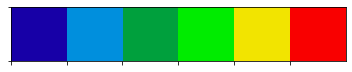

In [2]:
current_palette = sns.color_palette('nipy_spectral')
sns.palplot(current_palette)

Once you're happy with the selection, execute the next cell to set the colour

In [3]:
sns.set_palette(current_palette)

Set the style as well.

In [4]:
sns.set_style('darkgrid')

Adjust `rcParams`

In [5]:
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rcParams['font.size'] = '6.0'
matplotlib.rcParams['figure.figsize'] = '10, 5'
matplotlib.rcParams['figure.dpi'] = '150'

## Adjusted R²

The R-squared increases when the number of features increase, encouraging overfitting. A more robust evaluator is sometimes preferred to compare the performance between different models - the adjusted $R^{2}$. It only increases, if the addition of the variable reduces the MSE. The definition of the adjusted $R^{2}$ is:

$\bar{R^{2}}=R^{2}-\frac{k-1}{n-k}(1-R^{2})$

where $n$ is the number of observations and $k$ is the number of parameters. 

In [6]:
def adjustedR2(r2, n, k):
    return r2-(k-1)/(n-k)*(1-r2)

----

# Step 1 - Get Data

Firstly, we load the housing data with the `read_csv` constructor.

We then begin our exploratory analysis.

In [7]:
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


**Descriptive Statistics Analysis**

1. There are a total of `21,613` samples but no missing values are found.
2. For `price`, standard deviation of `367,127` is a large number in relation to the mean `540,088`. Some individual prices may vary a lot from the mean.
3. For `sqft_living`, standard deviation of `918` is significantly smaller than the mean of `2079`. It means most of individual living spaces do not vary a lot around the mean.
4. The mean of `condition` is more than `3.4`. Most properties have average-above conditions even though they do not have any `view`.
5. `waterfront` has a standard deviation of `0.086517` - much less than the mean `0.5`, which means most of properties are by the water.
6. The properties were built between the year of `1900` and the year of `2015`.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


From the above we can see that there doesn't seem to be any missing values, as all features contain the same number of observations.

Let's visualize the most obvious relationship (`price` vs `sqft_living`) and see if we can draw any patterns.

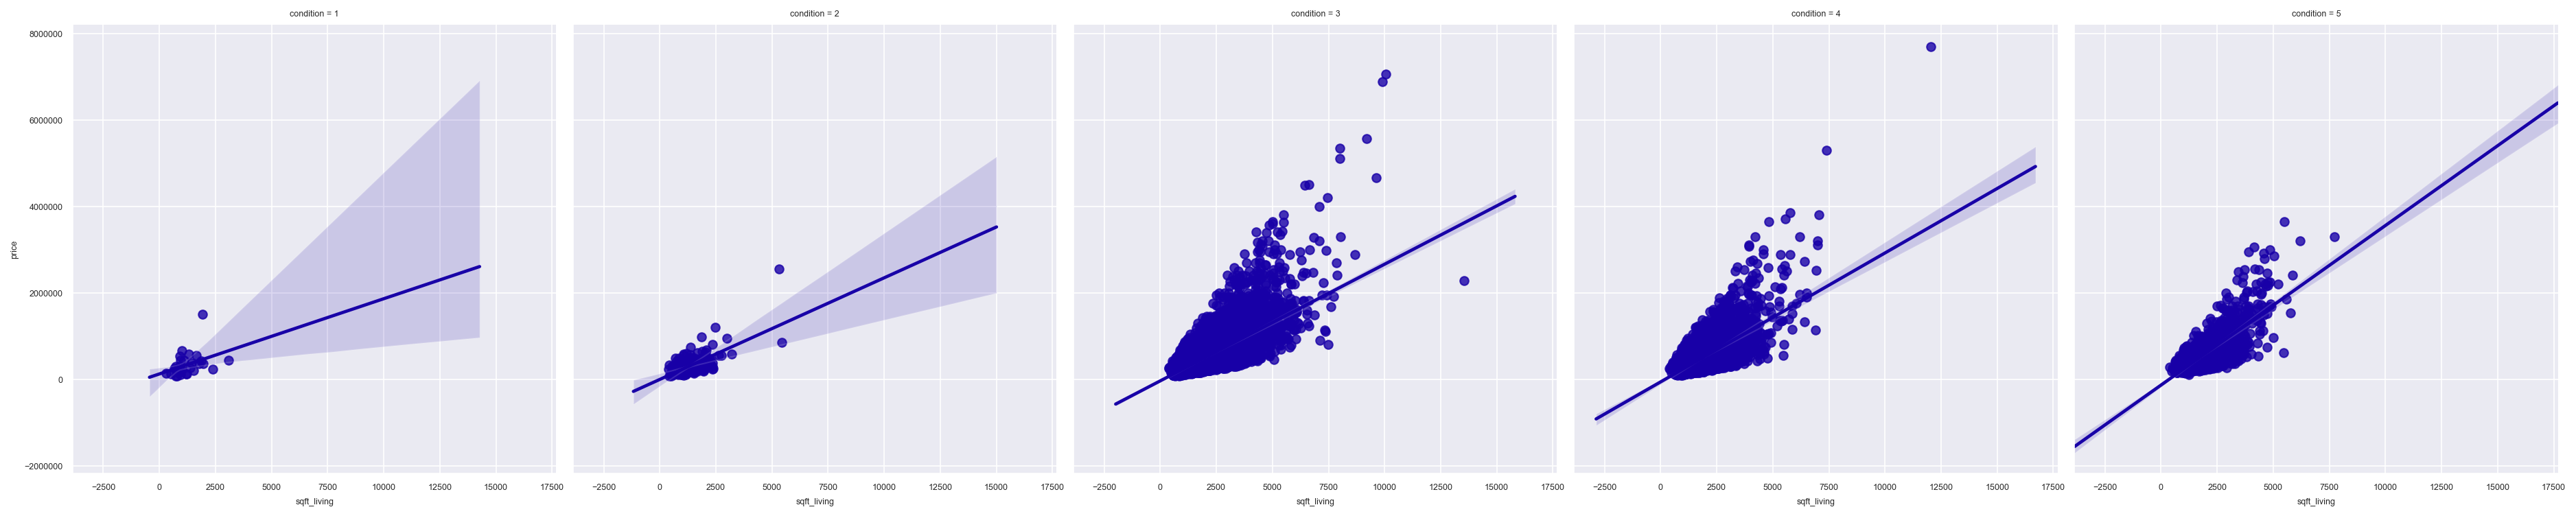

In [10]:
sns.lmplot(data=df,
           x='sqft_living',
           y='price',
           col='condition')

In [11]:
condition_mapping = {1: 'A',
                     2: 'B',
                     3: 'C',
                     4: 'D',
                     5: 'E',
                     6: 'F'}
df['condition_str'] = df['condition'].map(condition_mapping)

In [12]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,condition_str
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,C
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,C
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,C
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,E
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,C


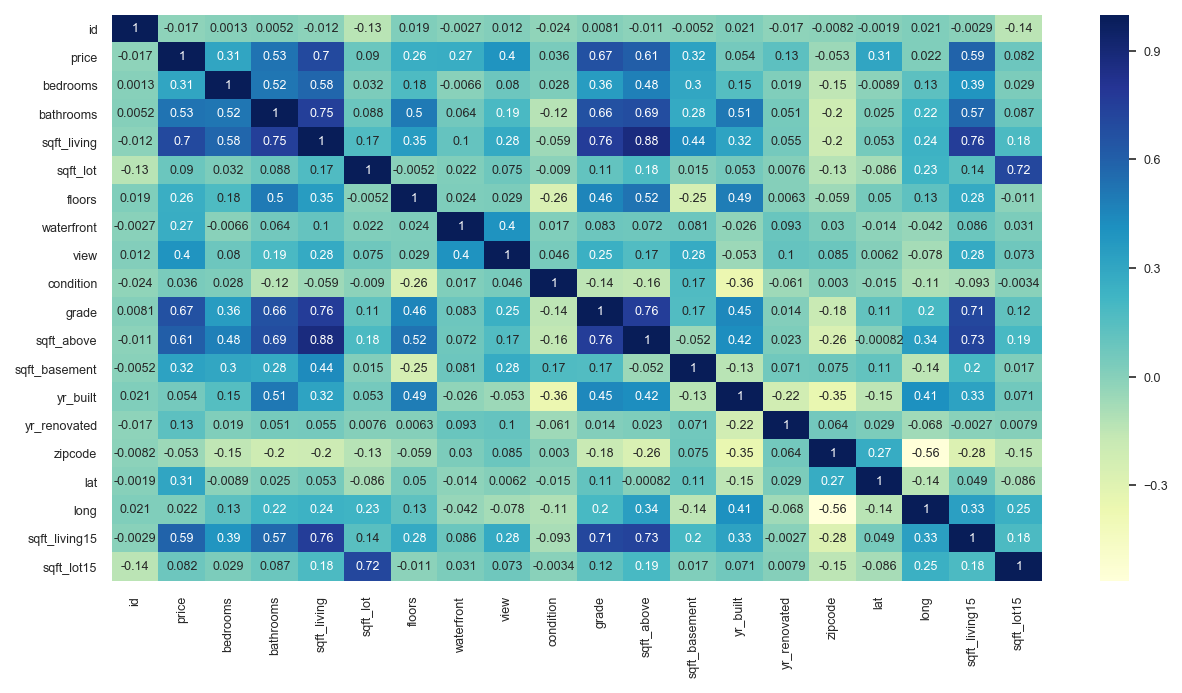

In [13]:
sns.heatmap(df.corr(),
            annot=True,
            cmap='YlGnBu')

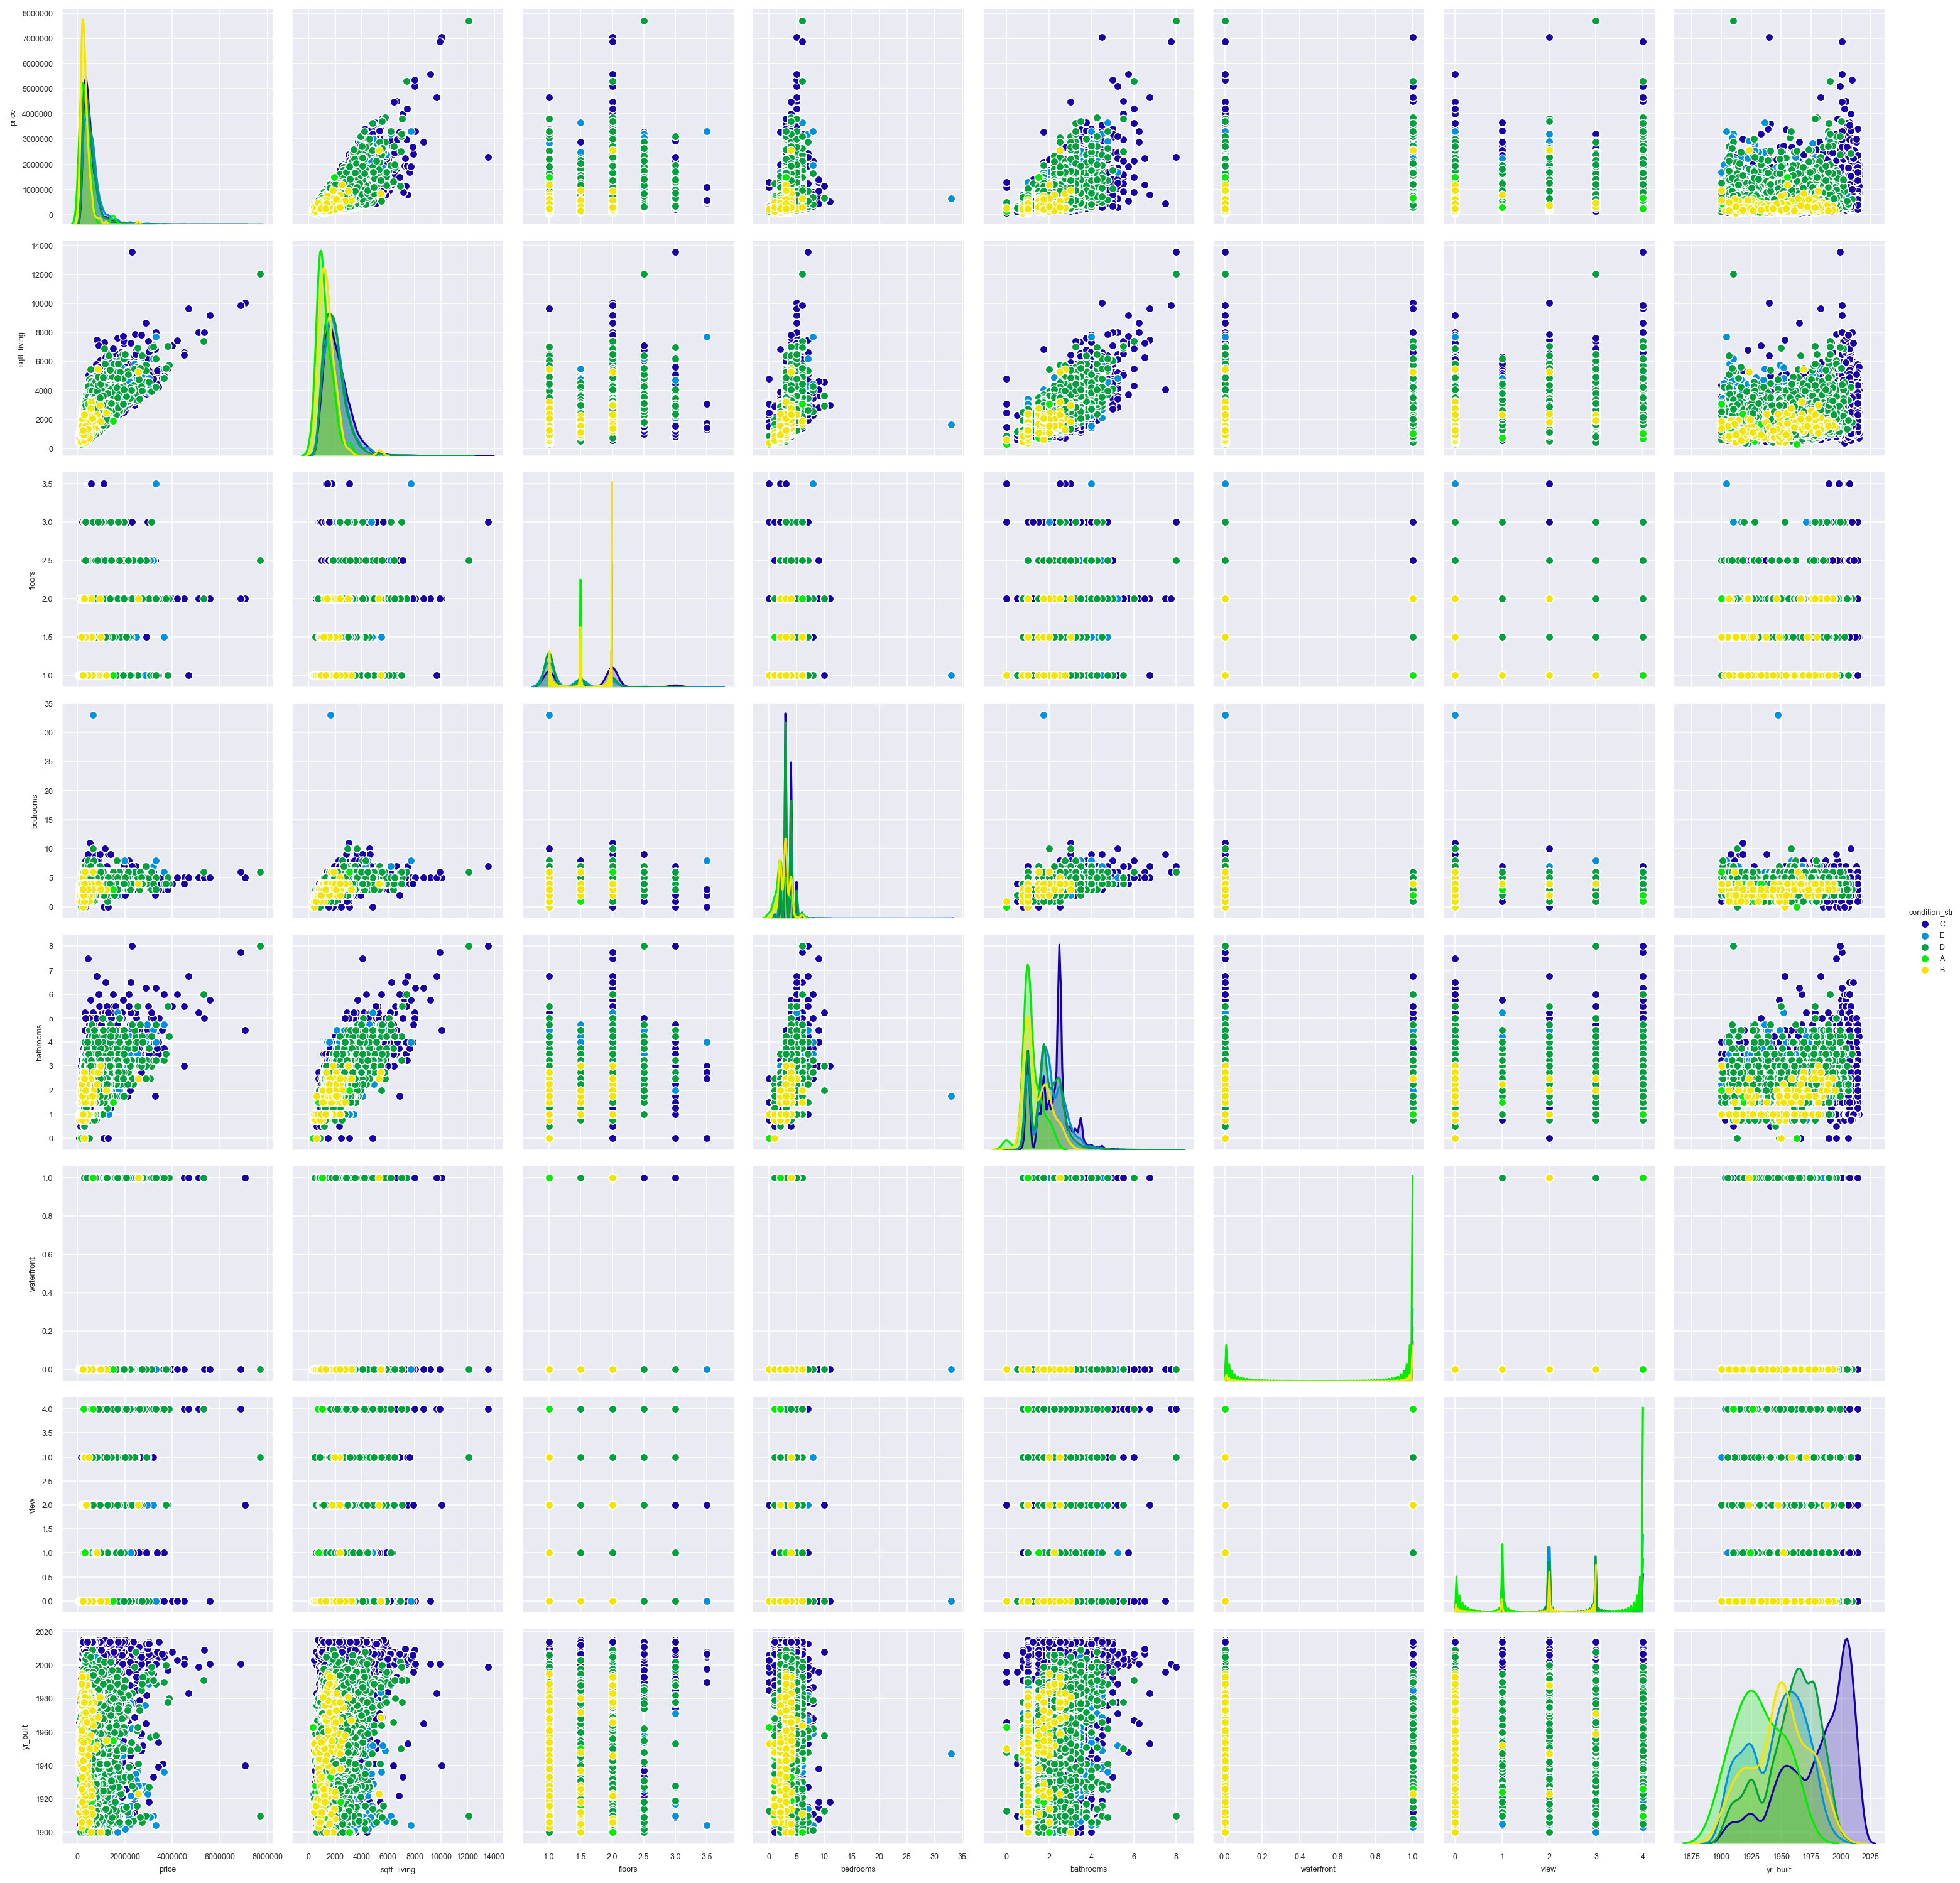

In [14]:
sns.pairplot(df, vars=['price',
                       'sqft_living',
                       'floors',
                       'bedrooms',
                       'bathrooms',
                       'waterfront',
                       'view',
                       'yr_built'],
             hue='condition_str')

----

# Step 2 - Clean, Prepare & Manipulate Data

Before that, let's drop some columns that will not be of use. 

We will go through each of the following features and determine the appropriate treatment:

- `date`
- `price`
- `bedrooms`
- `bathrooms`
- `sqft_living`
- `sqft_lot`
- `floors`
- `waterfront`
- `view`
- `condition`
- `grade`
- `sqft_above`
- `sqft_basement`
- `yr_built`
- `yr_renovated`
- `zipcode`
- `lat`
- `long`

In [15]:
df.drop(['id', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,condition_str
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,C
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,C
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,C
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,E
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,C


### Feature 1 - `date`

Firstly, the `date` feature is of the wrong data type.

In [16]:
df['date'].dtype

dtype('O')

Thankfully, the `pandas` `DataFrame` object has methods to deal with this

In [17]:
df['date'] = df['date'].str.replace('T000000', '')
df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')

In [18]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['date']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))

DESCRIPTIVE STATISTICS
count                   21613
unique                    372
top       2014-06-23 00:00:00
freq                      142
first     2014-05-02 00:00:00
last      2015-05-27 00:00:00
Name: date, dtype: object


Now the data is ready

----

### Feature 2 - Price

Let's take a look at our value to be predicted, `price`

DESCRIPTIVE STATISTICS
count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


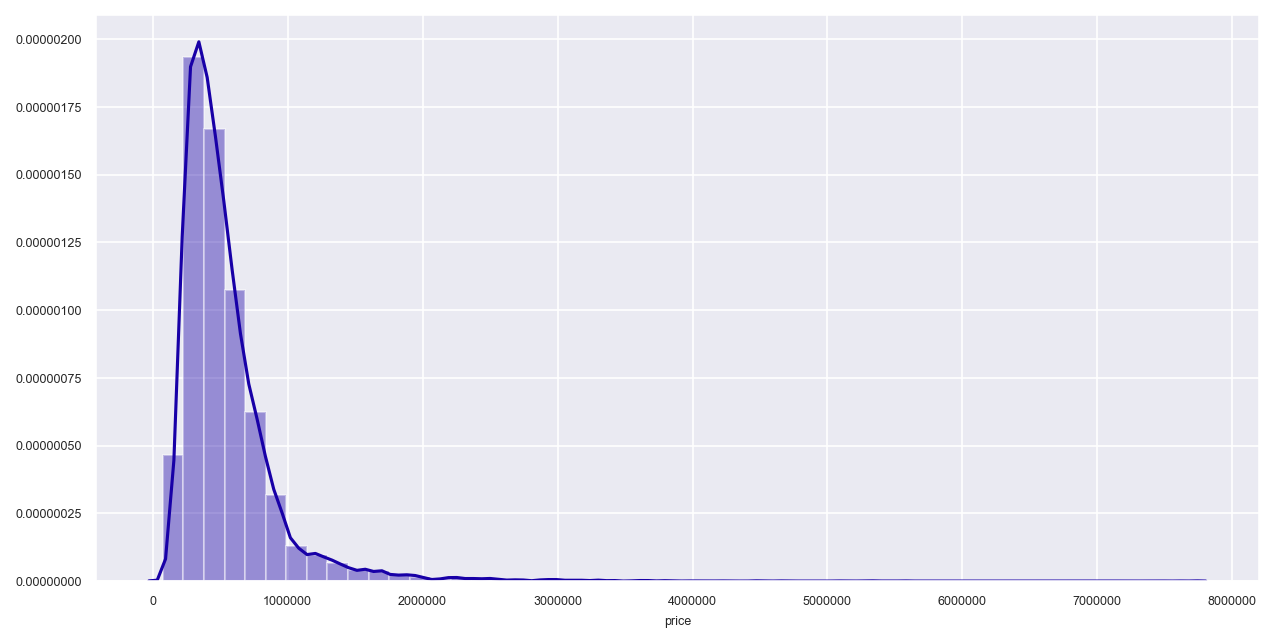

In [19]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['price']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
sns.distplot(feature)

The data is heavily skewed to the right, suggesting presence of very highly valued outliers. 

The data is now ready

----

### Feature 3 - `bedrooms`

Let's take a closer look at the data.

DESCRIPTIVE STATISTICS
count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64
VALUE COUNTS
3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64


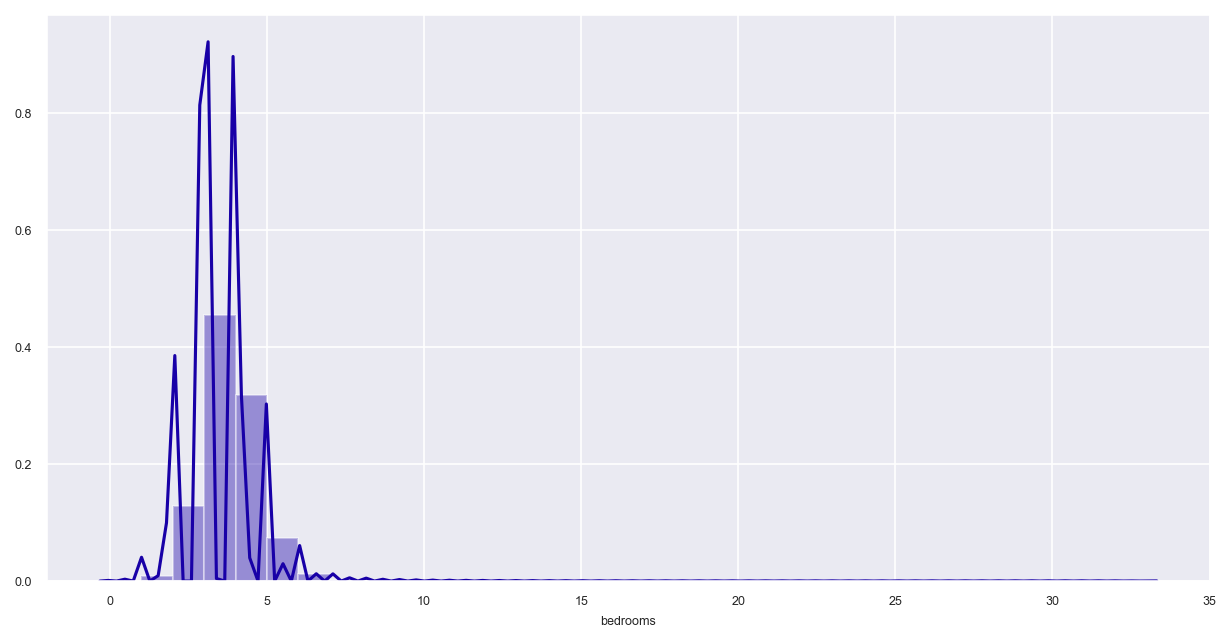

In [20]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['bedrooms']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
NewBins = np.arange(0, max(df['bedrooms']), 1)
sns.distplot(feature, bins=NewBins)

The data is already in numerical form. Hence, no more processing is required.

Now the data is ready

----

### Feature 4 - `bathrooms`

Data visualization

DESCRIPTIVE STATISTICS
count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64
VALUE COUNTS
2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64


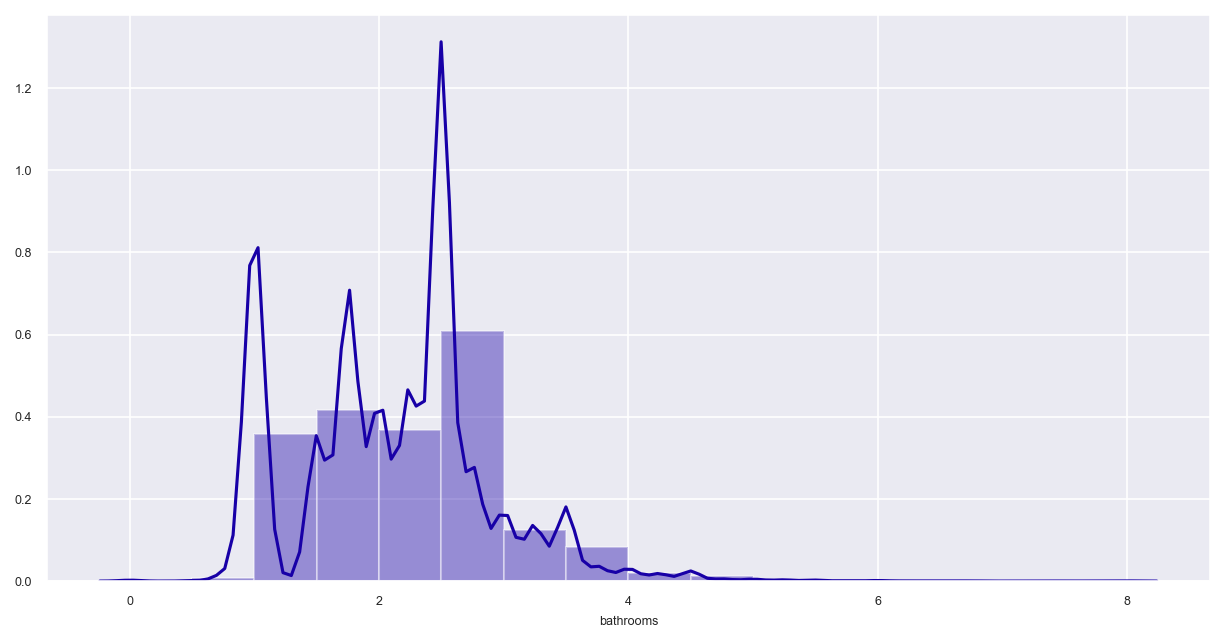

In [21]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['bathrooms']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))

NewBins = np.arange(0, max(feature), 0.5)
sns.distplot(feature, bins=NewBins)

We define a `numpy` range to make an enlarged bin size, producing a smoother histogram.

The data is already in numerical form, hence, no more processing is required.

Now the data is ready

----

### Feature 5 - `sqft_living`

Now we take a look at `sqft_living`:

DESCRIPTIVE STATISTICS
count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64
VALUE COUNTS
1300    138
1400    135
1440    133
1010    129
1660    129
       ... 
3001      1
4970      1
2905      1
2793      1
1975      1
Name: sqft_living, Length: 1038, dtype: int64


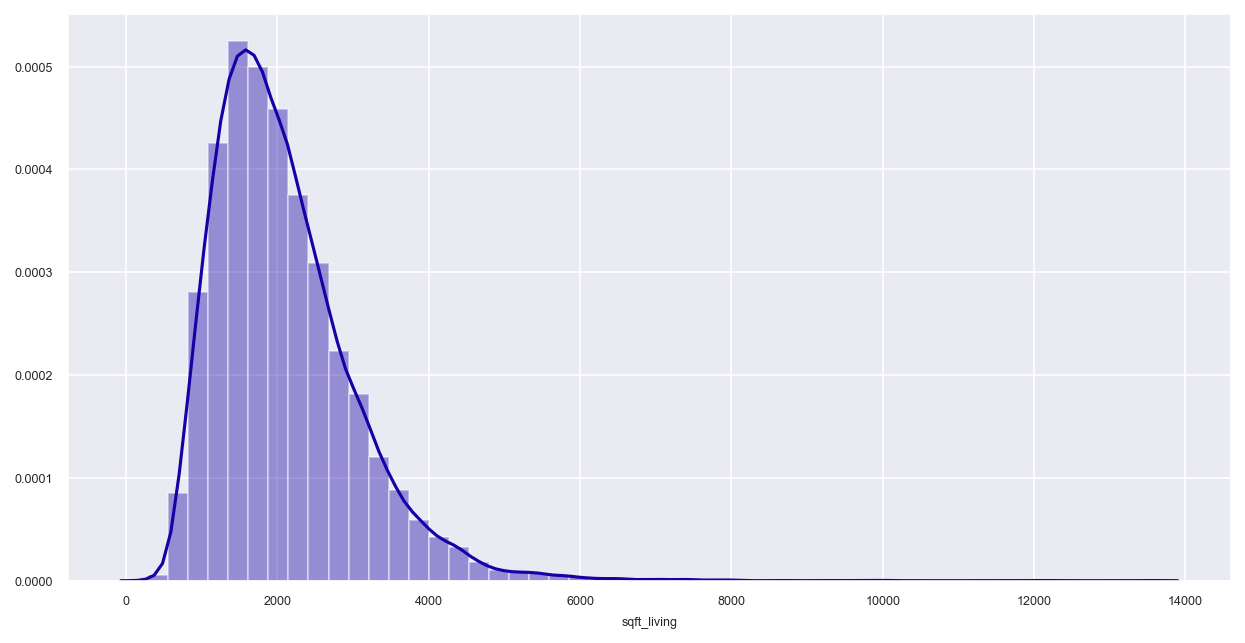

In [22]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['sqft_living']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.distplot(feature)

The feature is skewed to the right, suggesting most houses are larger than the average.

The data is already in numeric form. No further processing is necessary.

Now the data is ready

----

### Feature 6 - `sqft_lot`

Let's look at the data

DESCRIPTIVE STATISTICS
count    2.161300e+04
mean     1.510697e+04
std      4.142051e+04
min      5.200000e+02
25%      5.040000e+03
50%      7.618000e+03
75%      1.068800e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64
VALUE COUNTS
5000     358
6000     290
4000     251
7200     220
4800     120
        ... 
38884      1
17313      1
35752      1
937        1
14321      1
Name: sqft_lot, Length: 9782, dtype: int64


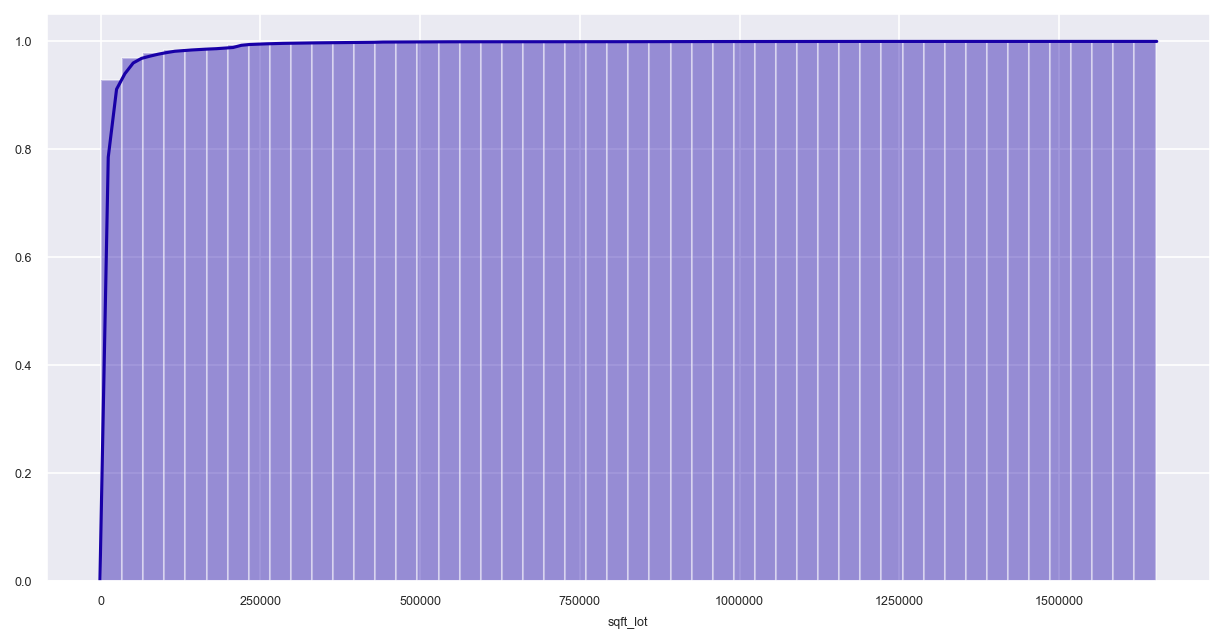

In [23]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['sqft_lot']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.distplot(feature,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True))

The cumulative histogram implies there are many outliers.

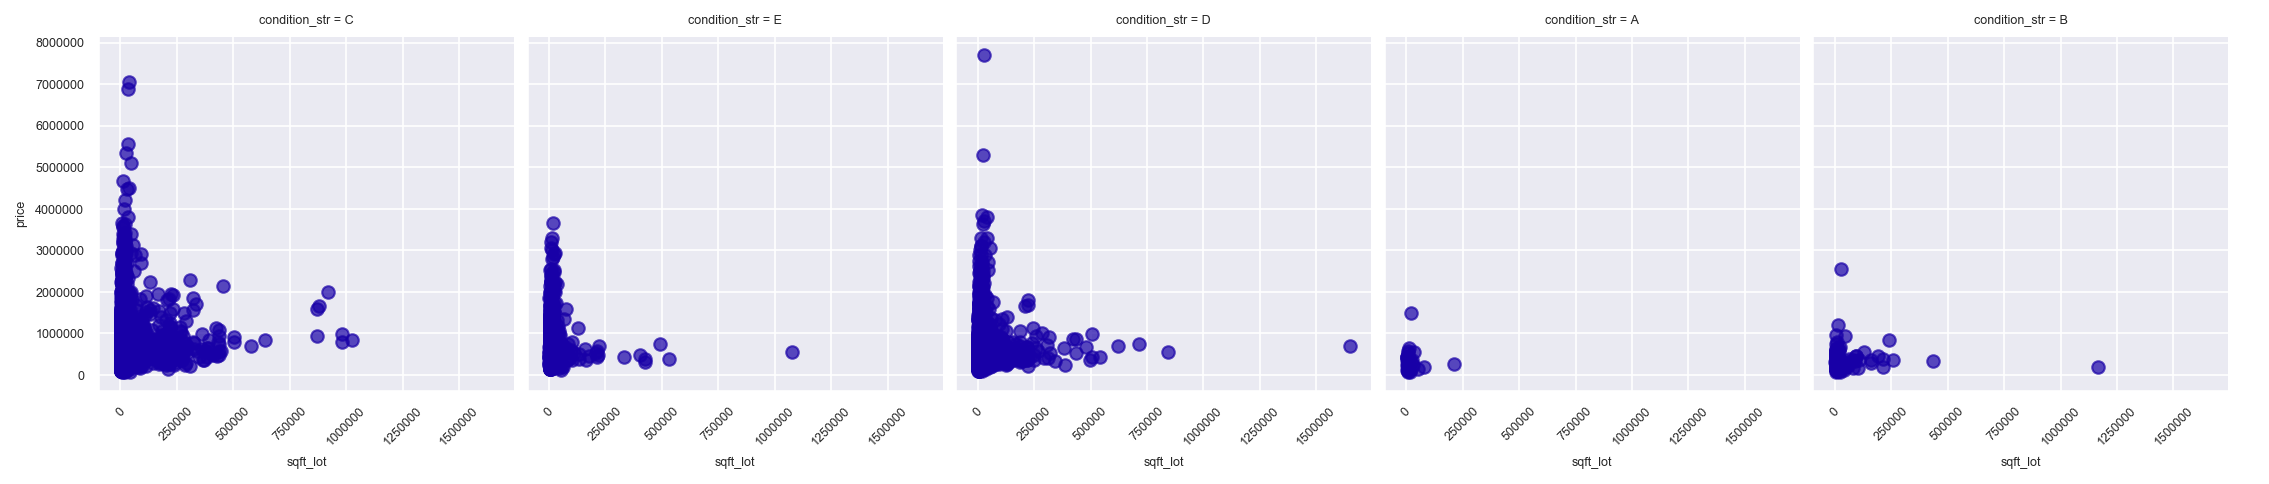

In [24]:
g = sns.FacetGrid(data=df, col='condition_str')
g.map(plt.scatter, 'sqft_lot', 'price', alpha=0.7)
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
g.add_legend()

Now the data is ready

----

### Feature 7 - `floors`

Data visualization

DESCRIPTIVE STATISTICS
count    21613.000000
mean         1.494309
std          0.539989
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64
VALUE COUNTS
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64


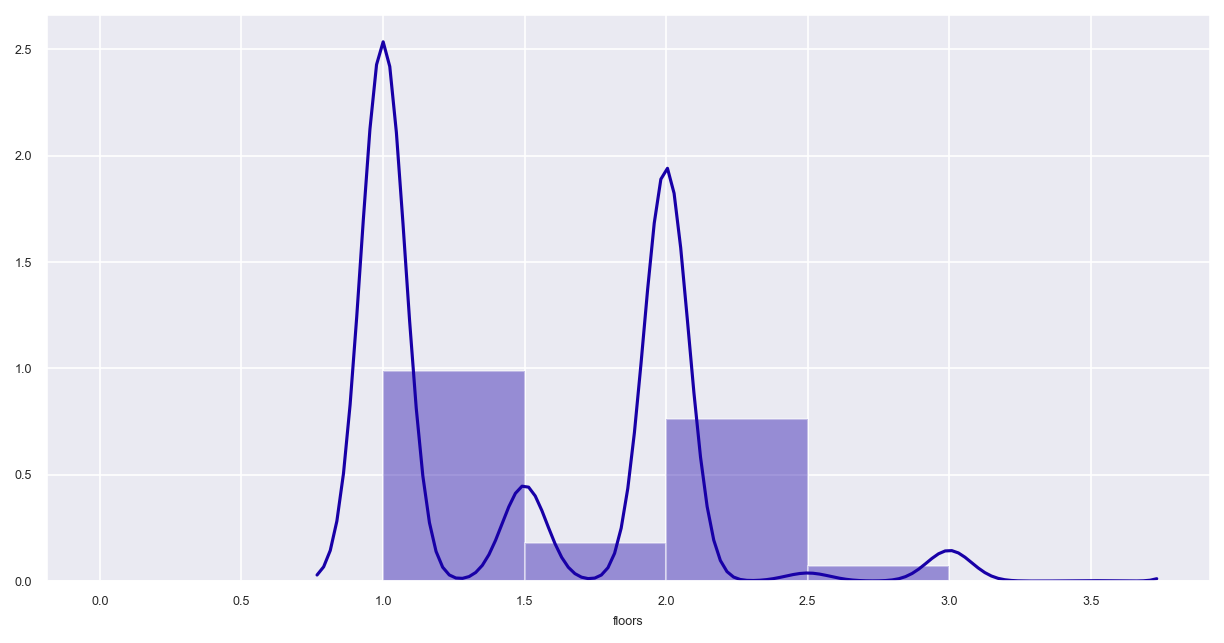

In [25]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['floors']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
NewBins = np.arange(0, max(feature), 0.5)
sns.distplot(feature, bins=NewBins)

The distribution is bi-modal, with 1 and 2 floor houses being the most common

Now the data is ready

----

### Feature 8 - `waterfront`

Let's look at the data

DESCRIPTIVE STATISTICS
count    21613.000000
mean         0.007542
std          0.086517
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: waterfront, dtype: float64
VALUE COUNTS
0    21450
1      163
Name: waterfront, dtype: int64


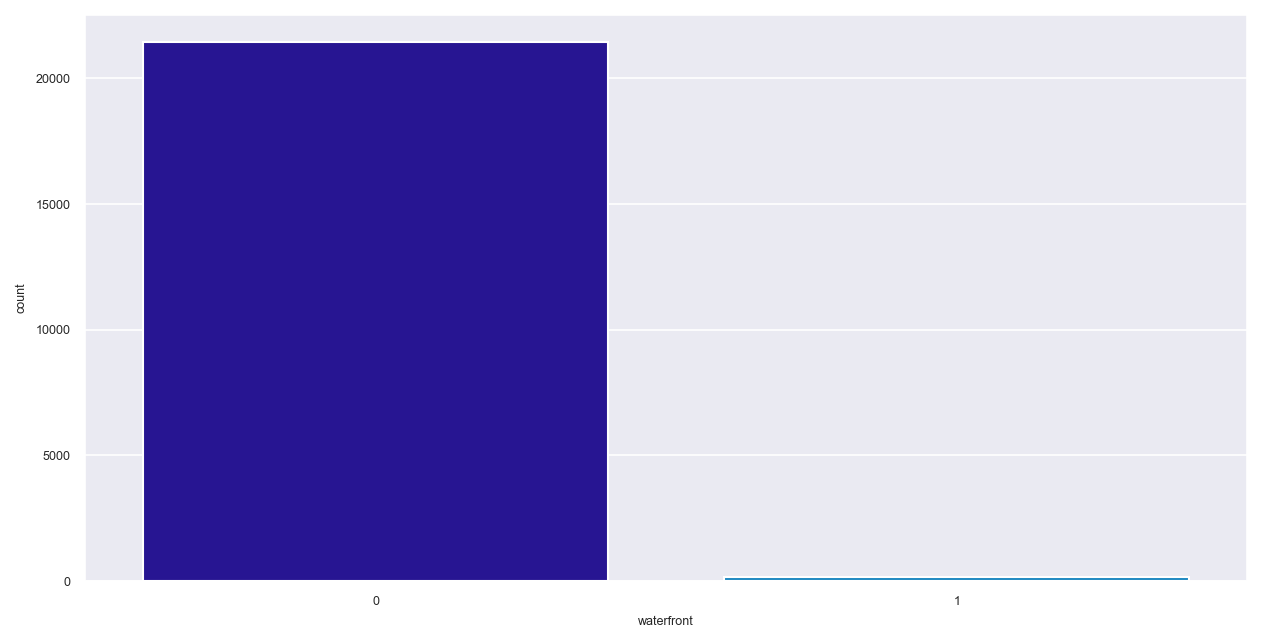

In [26]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['waterfront']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.countplot(feature)

Most properties are not by the water. This should also be a categorical variable.

We shall encode it using `Yes` and `No` values

In [27]:
waterfront_mapping = {0: 'No', 1: 'Yes'}
df['waterfront'] = df['waterfront'].map(waterfront_mapping)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,condition_str
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,No,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,C
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,No,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,C
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,No,0,3,6,770,0,1933,0,98028,47.7379,-122.233,C
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,No,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,E
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,No,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,C


Now the data is ready

----

### Feature 9 - `view`

Let's take a look at the data.

DESCRIPTIVE STATISTICS
count    21613.000000
mean         0.234303
std          0.766318
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64
VALUE COUNTS
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


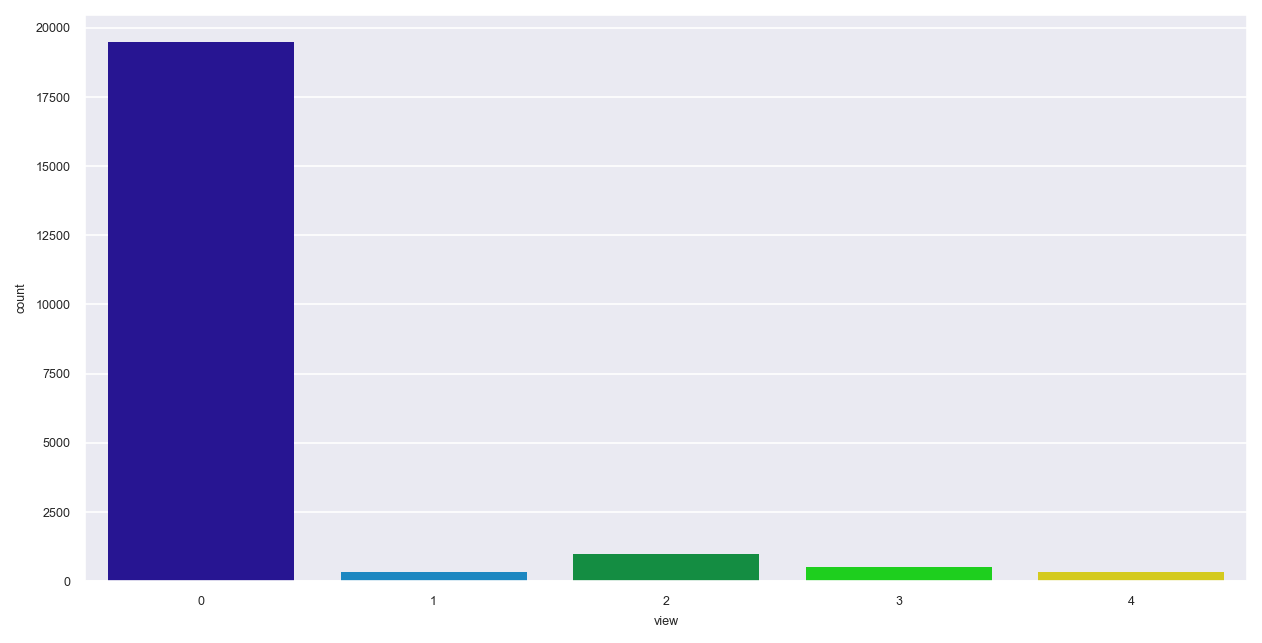

In [28]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['view']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.countplot(feature, edgecolor='None')

Most houses don't have a view. The data is already in ordinal form, so no further processing is required.

Now the data is ready

----

### Feature 10 - `condition`

Let's take a look at the data.

DESCRIPTIVE STATISTICS
count    21613.000000
mean         3.409430
std          0.650743
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64
VALUE COUNTS
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


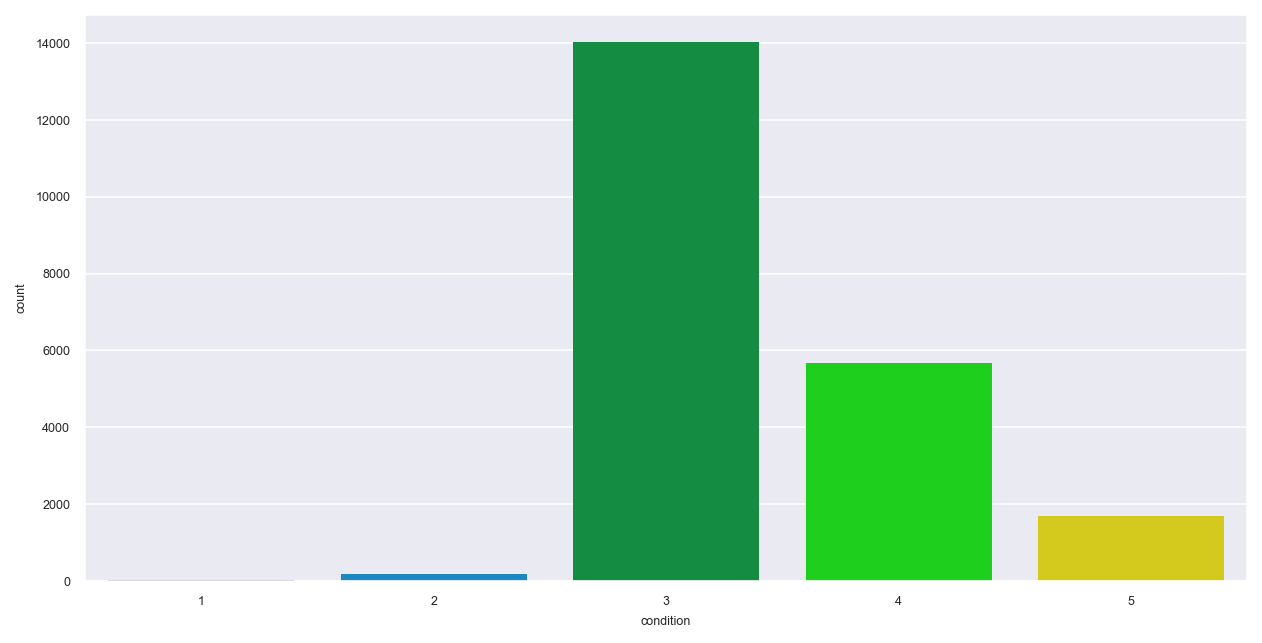

In [29]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['condition']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.countplot(feature, edgecolor='None')

Most of the houses are in condition 3. The data is already in ordinal numerical form, so no further processing is required.

Now the data is ready

----

### Feature 11 - `grade`

Let's take a look at the data.

DESCRIPTIVE STATISTICS
count    21613.000000
mean         7.656873
std          1.175459
min          1.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         13.000000
Name: grade, dtype: float64
VALUE COUNTS
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


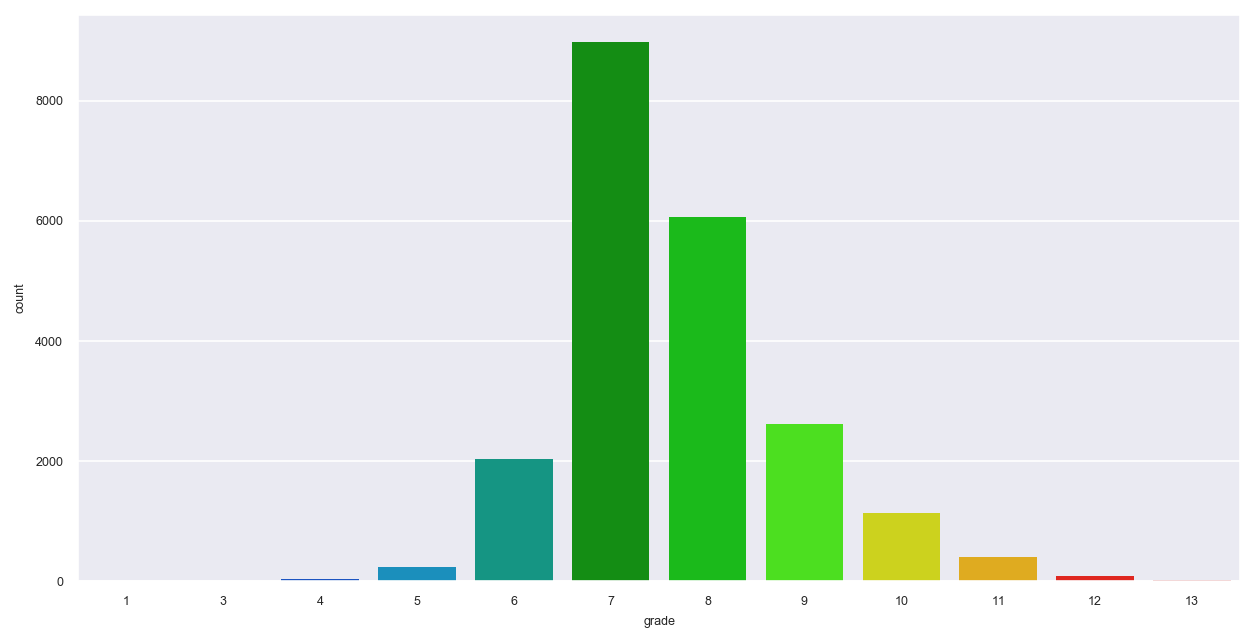

In [30]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['grade']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.countplot(feature, edgecolor='None', palette=sns.color_palette(
    'nipy_spectral', len(pd.unique(df['grade']))))

The data is already in ordinal numeric form, so no further processing is required

Now the data is ready

----

### Feature 12 - `sqft_above`

Let's take a look at the data

DESCRIPTIVE STATISTICS
count    21613.000000
mean      1788.390691
std        828.090978
min        290.000000
25%       1190.000000
50%       1560.000000
75%       2210.000000
max       9410.000000
Name: sqft_above, dtype: float64
VALUE COUNTS
1300    212
1010    210
1200    206
1220    192
1140    184
       ... 
2665      1
2601      1
440       1
2473      1
1975      1
Name: sqft_above, Length: 946, dtype: int64


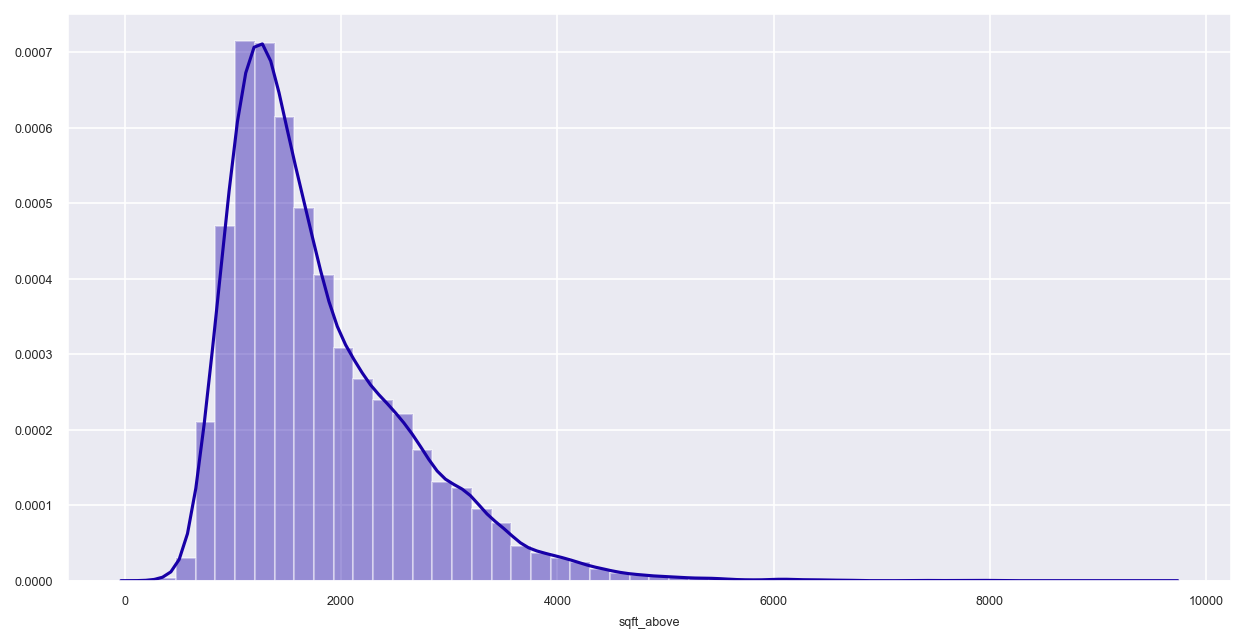

In [31]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['sqft_above']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.distplot(feature)

The data is skewed to the right. Since the data is already in numerical form, no further processing is required

Now the data is ready

----

### Feature 13 - `sqft_basement`

Let's take a look at the data.

DESCRIPTIVE STATISTICS
count    21613.000000
mean       291.509045
std        442.575043
min          0.000000
25%          0.000000
50%          0.000000
75%        560.000000
max       4820.000000
Name: sqft_basement, dtype: float64
VALUE COUNTS
0       13126
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64


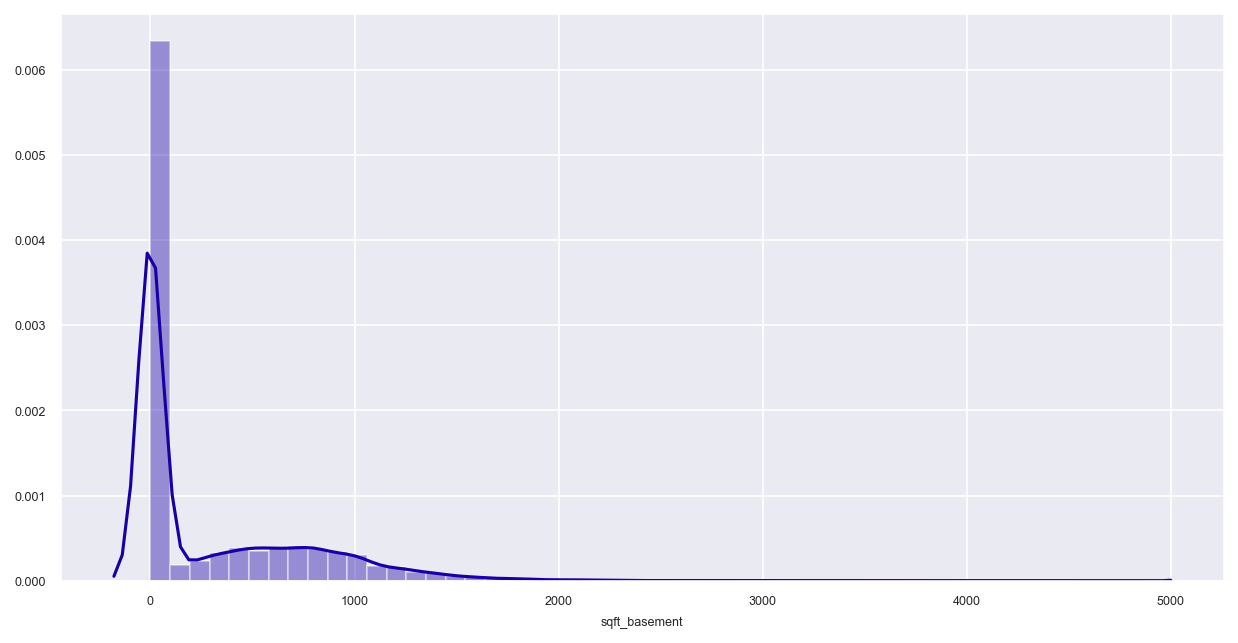

In [32]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['sqft_basement']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.distplot(feature)

There are alot of houses with no basement. Nonetheless, we leave this feature in due to some predictive power. (R-squared with price is 0.32)

The data is also already in numerical form. No further processing is required.

Now the data is ready

----

### Feature 14 and 15 - `year_built` & `year_renovated`

Let's take a look at the data.

DESCRIPTIVE STATISTICS
count    21613.000000
mean      1971.005136
std         29.373411
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64
VALUE COUNTS
2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]),
 <a list of 116 Text xticklabel objects>)

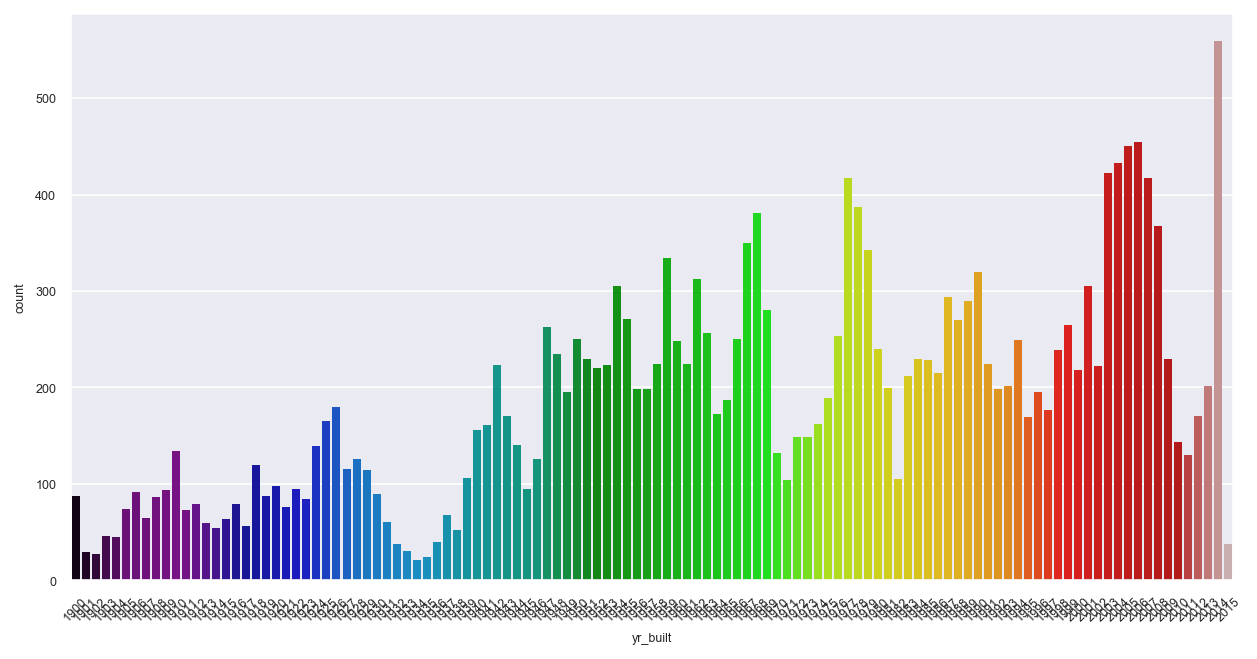

In [33]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['yr_built']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.countplot(feature, edgecolor='None', palette=sns.color_palette(
    'nipy_spectral', len(pd.unique(df['yr_built']))))
plt.xticks(rotation=45)

DESCRIPTIVE STATISTICS
count     914.000000
mean     1995.827133
std        15.517107
min      1934.000000
25%      1987.000000
50%      2000.000000
75%      2007.000000
max      2015.000000
Name: yr_renovated, dtype: float64
VALUE COUNTS
2014    91
2013    37
2003    36
2005    35
2000    35
        ..
1954     1
1948     1
1959     1
1944     1
1934     1
Name: yr_renovated, Length: 69, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68]), <a list of 69 Text xticklabel objects>)

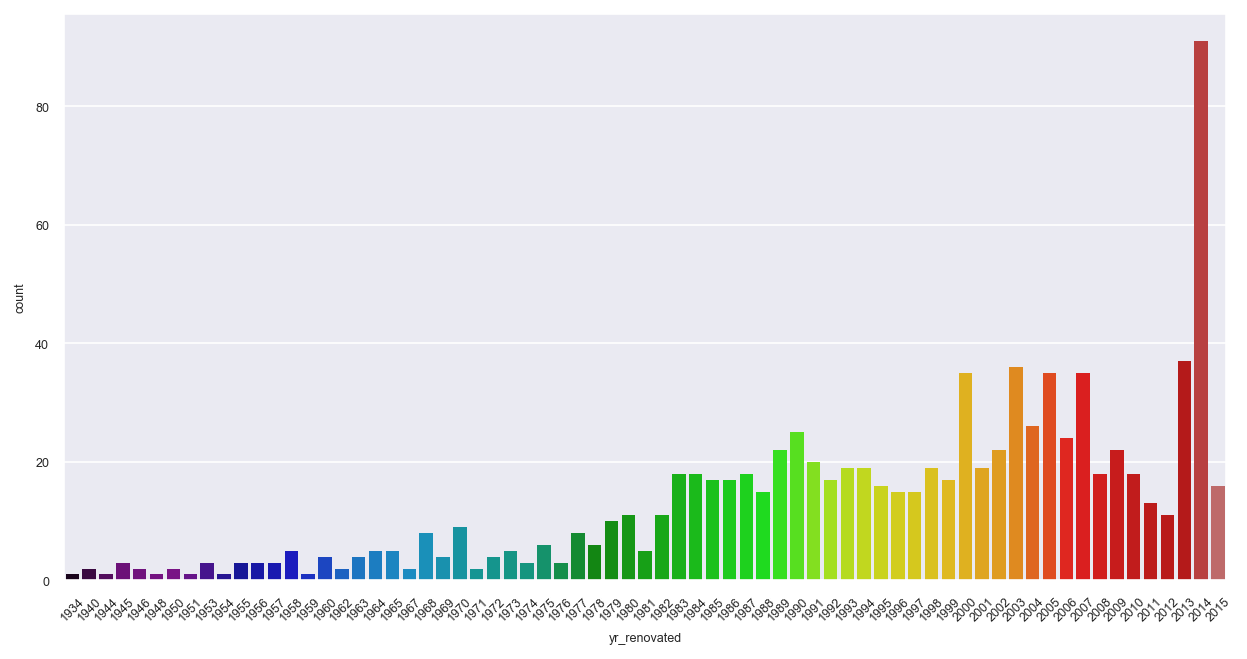

In [34]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['yr_renovated'][df['yr_renovated'] != 0]
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.countplot(feature, edgecolor='None', palette=sns.color_palette(
    'nipy_spectral', len(pd.unique(df['yr_renovated']))))
plt.xticks(rotation=45)

The data is already numeric. However, we should check that `yr_renovated` is larger than `yr_built` if it is not blank

In [35]:
df[(df['yr_renovated'] != 0) & (df['yr_renovated'] < df['yr_built'])]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,condition_str


There are no erroneous data.

----

### Feature 16 - `zipcode`

Let's take a look at the data.

DESCRIPTIVE STATISTICS
count    21613.000000
mean     98077.939805
std         53.505026
min      98001.000000
25%      98033.000000
50%      98065.000000
75%      98118.000000
max      98199.000000
Name: zipcode, dtype: float64
VALUE COUNTS
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69]), <a list of 70 Text xticklabel objects>)

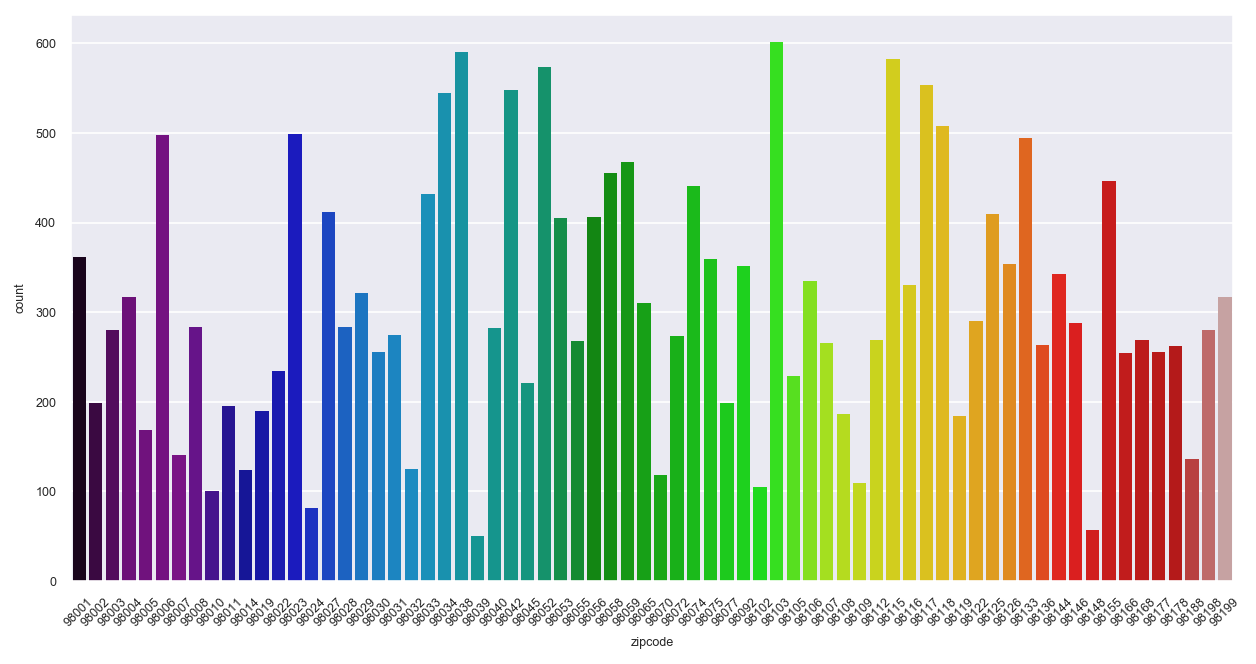

In [36]:
title_str = 'DESCRIPTIVE STATISTICS'
feature = df['zipcode']
print('='*len(title_str))
print(title_str)
print('='*len(title_str))
print(feature.describe())
print('='*len(title_str))
print('VALUE COUNTS')
print('='*len(title_str))
print(feature.value_counts())
print('='*len(title_str))
sns.countplot(feature, edgecolor='None', palette=sns.color_palette(
    'nipy_spectral', len(pd.unique(df['zipcode']))))
plt.xticks(rotation=45)

`zipcode` should be categorical in nature. Let's fix this with the `astype` method for `pandas`

In [37]:
df['zipcode'] = df['zipcode'].astype('str')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
date             21613 non-null datetime64[ns]
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null object
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null object
lat              21613 non-null float64
long             21613 non-null float64
condition_str    21613 non-null object
dtypes: datetime64[ns](1), float64(5), int64(10), object(3)
memory usage: 3.1+ MB


Now the data is ready

----

### Feature 17 and 18 - `lat` and `long`

Let's take a look at the data.

In [38]:
title_str = 'DESCRIPTIVE STATISTICS FOR [{}]'
title_str2 = 'VALUE COUNTS FOR [{}]'
feature = df['lat']
feature2 = df['long']

print('='*len(title_str.format('lat')))
print(title_str.format('lat'))
print('='*len(title_str.format('lat')))
print(feature.describe())
print("")
print('='*len(title_str.format('long')))
print(title_str.format('long'))
print('='*len(title_str.format('long')))
print(feature2.describe())
print("")
print('='*len(title_str2.format('lat')))
print(title_str2.format('lat'))
print('='*len(title_str2.format('lat')))
print(feature.value_counts())
print("")
print('='*len(title_str2.format('long')))
print(title_str2.format('long'))
print('='*len(title_str2.format('long')))
print(feature2.value_counts())

DESCRIPTIVE STATISTICS FOR [lat]
count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

DESCRIPTIVE STATISTICS FOR [long]
count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

VALUE COUNTS FOR [lat]
47.5491    17
47.6846    17
47.6624    17
47.5322    17
47.6711    16
           ..
47.4686     1
47.2495     1
47.4237     1
47.4142     1
47.2715     1
Name: lat, Length: 5034, dtype: int64

VALUE COUNTS FOR [long]
-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.499      1
-121.792      1
-122.512      1
-122.484      1
-121.893      1
Name: long, Length: 752, dtype: int64


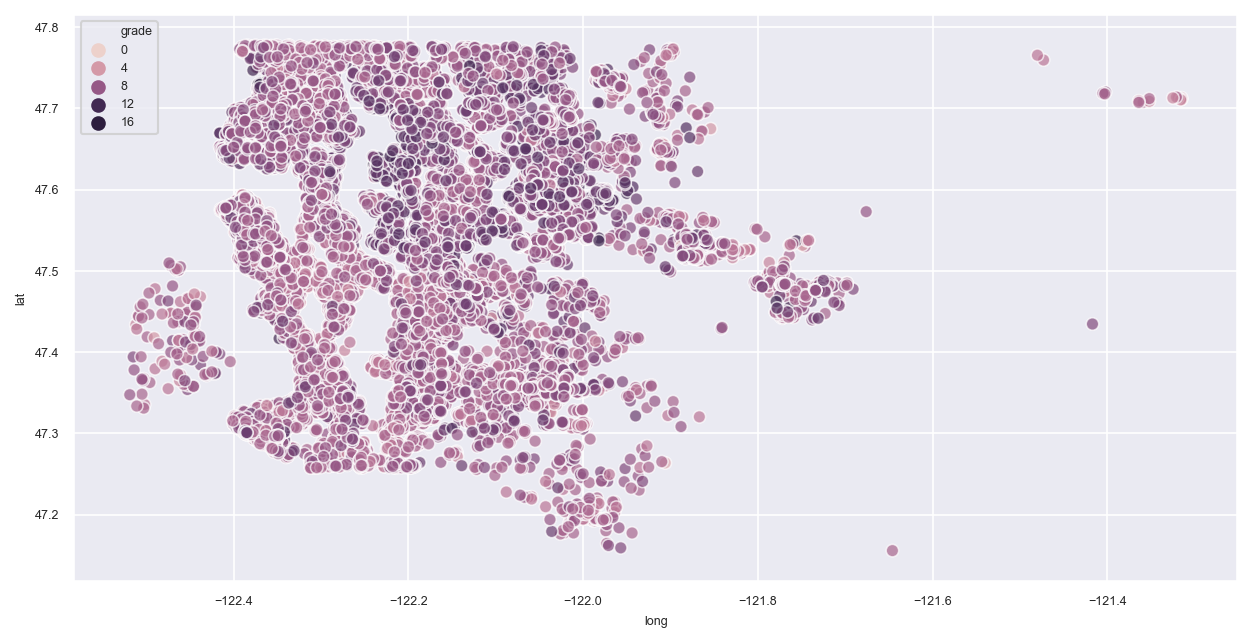

In [39]:
sns.scatterplot(data=df,
                x='long',
                y='lat',
                hue='grade',
                alpha=0.7)

The data is already in numerical form, and ready to be used. No further processing necessary

Now the data is ready

----

----

# Step 3 - Train Model & Step 4 - Test Data

Now that we have cleaned up the data, it is time to fit the data to some regression models.

We will test the models along the way using the following metrics

- Mean Squared Error
- $R^{2}$
- Adjusted $R^{2}$
- Five-fold Cross Validation

## Split data

Firstly, we use `scikit-learn` in-built `train_test_split`. 

We split the main `DataFrame` into training and testing sets without specifying the targets, as we will be specifying them later.

In [40]:
train_data, test_data = train_test_split(df, train_size=0.8, random_state=3)

We also initialise an empty `DataFrame` to hold our results:

In [41]:
results = pd.DataFrame({'Model': [],
                        'Details': [],
                        'Root Mean Squared Error (RMSE)': [],
                        'R-squared (training)': [],
                        'Adjusted R-squared (training)': [],
                        'R-squared (test)': [],
                        'Adjusted R-squared (test)': [],
                        '5-Fold Cross Validation': []})
results

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation


## Model 1 - Simple Regression

Let's use the `LinearRegression` classifier as our first model.

In [42]:
lr = linear_model.LinearRegression()

X_train = np.array(train_data['sqft_living'], dtype=pd.Series).reshape(-1, 1)
Y_train = np.array(train_data['price'], dtype=pd.Series)
lr.fit(X_train, Y_train)

X_val = np.array(test_data['sqft_living'], dtype=pd.Series).reshape(-1, 1)
Y_val = np.array(test_data['price'], dtype=pd.Series)
Y_pred = lr.predict(X_val)

rmse = float(
    format(np.sqrt(metrics.mean_squared_error(Y_val, Y_pred)), '.3f'))
rsq_train = float(format(lr.score(X_train, Y_train), '.3f'))
rsq_test = float(format(lr.score(X_val, Y_val), '.3f'))
cv = float(format(cross_val_score(
    lr, df[['sqft_living']], df['price'], cv=5).mean(), '.3f'))

# Print report
model = 'SIMPLE REGRESSION'
description = 'Standard regression with no parameter tuning'

title_str = 'EVALUATION REPORT FOR [{}]'
print('-'*len(title_str.format(model)))
print(title_str.format(model))
print('-'*len(title_str.format(model)))
print()
print('Description: {}'.format(description))
print(
    'The root mean squared error of the [{}] model is [{}].'.format(model, rmse))
print(
    'The root mean squared error of the training data is [{}].'.format(rsq_train))
print('The root mean squared error of the test data is [{}].'.format(rsq_test))
print('The five-fold cross validation score is [{}].'.format(cv))
print()
print("Average Price for Test Data: [{:.3f}]".format(Y_val.mean()))
print('Intercept: [{}]'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

-----------------------------------------
EVALUATION REPORT FOR [SIMPLE REGRESSION]
-----------------------------------------

Description: Standard regression with no parameter tuning
The root mean squared error of the [SIMPLE REGRESSION] model is [254289.149].
The root mean squared error of the training data is [0.492].
The root mean squared error of the test data is [0.496].
The five-fold cross validation score is [0.491].

Average Price for Test Data: [539744.130]
Intercept: [-47235.81130290043]
Coefficient: [282.2468152]


Let's show the result of this simple model

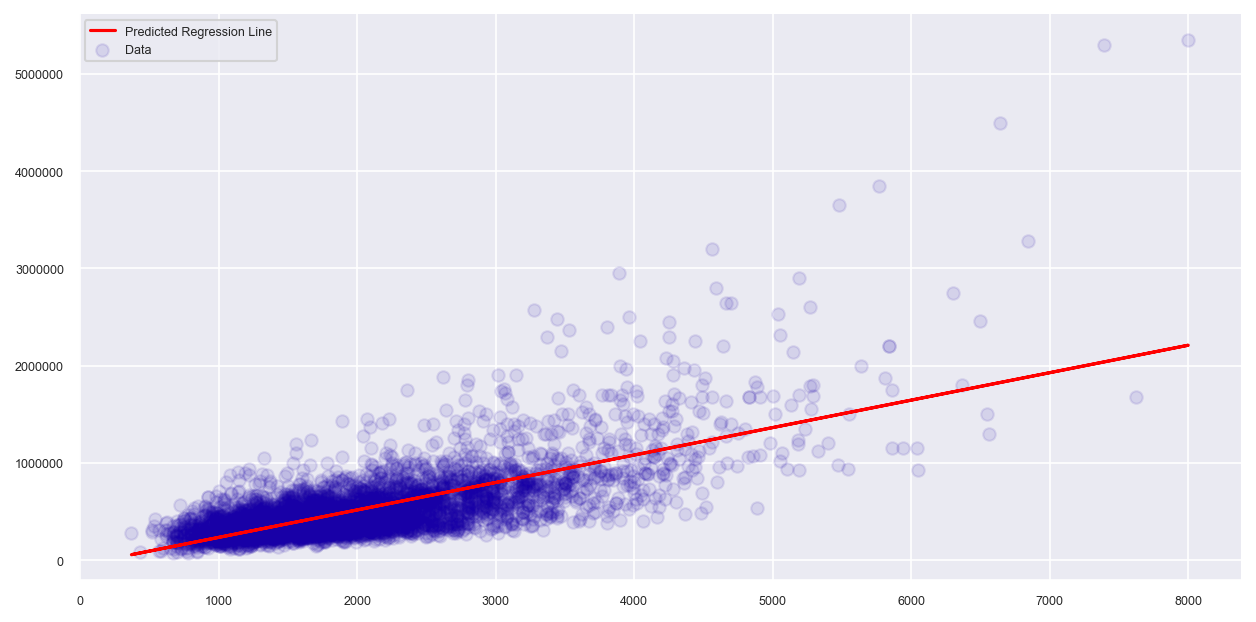

In [43]:
plt.scatter(X_val, Y_val, label="Data", alpha=.1)
plt.plot(X_val, lr.predict(X_val), color="red",
         label="Predicted Regression Line")
plt.legend()

plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

Input data into the `results` `DataFrame`

In [44]:
results.loc[1] = [model, description, rmse, rsq_train,"", rsq_test,"", cv]
results

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,SIMPLE REGRESSION,Standard regression with no parameter tuning,254289.149,0.492,,0.496,,0.491


## Model 2 - Multiple Regression

Let's try a multiple regression for the next one, with the following features:

- `bedrooms`
- `bathrooms`
- `sqft_living`
- `sqft_above`
- `floors`
- `grade`

In [45]:
features = ['bedrooms',
            'bathrooms',
            'sqft_living',
            'sqft_above',
            'floors',
            'grade']
X_train = train_data[features]
Y_train = train_data['price']
X_val = test_data[features]
Y_val = test_data['price']

MultipleR_1 = linear_model.LinearRegression()
MultipleR_1.fit(X_train, Y_train)

print('[MODEL OUTPUT]')
print('Intercept: {}'.format(MultipleR_1.intercept_))
print('Coefficients: {}'.format(MultipleR_1.coef_))
print()

pred = MultipleR_1.predict(test_data[features])
rmse = float(format(np.sqrt(metrics.mean_squared_error(
    test_data['price'], pred)), '.3f'))  # Root Mean Squared Error
rsq_train = float(format(MultipleR_1.score(X_train, Y_train), '.3f'))
adj_r_train = float(format(adjustedR2(MultipleR_1.score(
    train_data[features], train_data['price']), train_data.shape[0], len(features)), '.3f'))
rsq_test = float(format(MultipleR_1.score(X_val, Y_val), '.3f'))
adj_r_test = float(format(adjustedR2(MultipleR_1.score(
    test_data[features], test_data['price']), test_data.shape[0], len(features)), '.3f'))
cv = float(format(cross_val_score(MultipleR_1,
                                  df[features],
                                  df['price'],
                                  cv=5).mean(), '.3f'))  # 5-fold Cross Validation

model = 'MULTIPLE REGRESSION'
description = 'Multiple regression using bedrooms, bathrooms, sqft_living, sqft_above, floors and grade'
title_str = 'EVALUATION REPORT FOR [{}]'
print('-'*len(title_str.format(model)))
print(title_str.format(model))
print('-'*len(title_str.format(model)))
print()
print('Description: {}'.format(description))
print()
print(
    'The root mean squared error of the [{}] model is [{}].'.format(model, rmse))
print(
    'The R^2 of the training data is [{}].'.format(rsq_train))
print(
    'The Adjusted R^2 of the [{}] the training data is [{}].'.format(model, adj_r_train))
print('The R^2 of the test data is [{}].'.format(rsq_test))
print(
    'The Adjusted R^2 of the [{}] the test data is [{}].'.format(model, adj_r_test))
print('The five-fold cross validation score is [{}].'.format(cv))
print()
print("Average Price for Test Data: [{:.3f}]".format(Y_val.mean()))
print('Intercept: [{}]'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

[MODEL OUTPUT]
Intercept: -527524.9788500572
Coefficients: [-4.04700912e+04 -2.21133195e+04  2.77535241e+02 -7.66446673e+01
 -1.24962861e+04  1.08348788e+05]

-------------------------------------------
EVALUATION REPORT FOR [MULTIPLE REGRESSION]
-------------------------------------------

Description: Multiple regression using bedrooms, bathrooms, sqft_living, sqft_above, floors and grade

The root mean squared error of the [MULTIPLE REGRESSION] model is [238819.172].
The R^2 of the training data is [0.549].
The Adjusted R^2 of the [MULTIPLE REGRESSION] the training data is [0.549].
The R^2 of the test data is [0.556].
The Adjusted R^2 of the [MULTIPLE REGRESSION] the test data is [0.555].
The five-fold cross validation score is [0.548].

Average Price for Test Data: [539744.130]
Intercept: [-47235.81130290043]
Coefficient: [282.2468152]


In [46]:
results.loc[2] = [model, description, rmse, rsq_train, adj_r_train, rsq_test, adj_r_test, cv] # store results
results

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,SIMPLE REGRESSION,Standard regression with no parameter tuning,254289.149,0.492,,0.496,,0.491
2,MULTIPLE REGRESSION,"Multiple regression using bedrooms, bathrooms,...",238819.172,0.549,0.549,0.556,0.555,0.548


## Model 3a - Polynomial - 2nd Degree

Now, let's fit the features to a 2nd degree polynomial `LinearRegression()`

In [47]:
polyfeat = PolynomialFeatures(degree=2)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred = poly.predict(X_testpoly)
rmse = float(
    format(np.sqrt(metrics.mean_squared_error(test_data['price'], pred)), '.3f'))
rsq_train = float(format(poly.score(X_trainpoly, train_data['price']), '.3f'))

rsq_test = float(format(poly.score(X_testpoly, test_data['price']), '.3f'))

cv = float(format(cross_val_score(linear_model.LinearRegression(),
                                  X_allpoly, df['price'], cv=5).mean(), '.3f'))

model = 'POLYNOMIAL (2ND DEGREE)'
description = 'Polynomial Feature transform applied to LinearRegression (2nd Degree)'

title_str = 'EVALUATION REPORT FOR [{}]'
print('-'*len(title_str.format(model)))
print(title_str.format(model))
print('-'*len(title_str.format(model)))
print()
print('Description: {}'.format(description))
print()
print(
    'The root mean squared error of the [{}] model is [{}].'.format(model, rmse))
print(
    'The R^2 of the training data is [{}].'.format(rsq_train))
print('The R^2 of the test data is [{}].'.format(rsq_test))
print('The five-fold cross validation score is [{}].'.format(cv))
print()
print("Average Price for Test Data: [{:.3f}]".format(Y_val.mean()))
print('Intercept: [{}]'.format(poly.intercept_))
print('Coefficient: {}'.format(poly.coef_))
print('-'*len(title_str.format(model)))
print('END OF REPORT')
print('-'*len(title_str.format(model)))
print()

-----------------------------------------------
EVALUATION REPORT FOR [POLYNOMIAL (2ND DEGREE)]
-----------------------------------------------

Description: Polynomial Feature transform applied to LinearRegression (2nd Degree)

The root mean squared error of the [POLYNOMIAL (2ND DEGREE)] model is [220285.04].
The R^2 of the training data is [0.619].
The R^2 of the test data is [0.622].
The five-fold cross validation score is [0.565].

Average Price for Test Data: [539744.130]
Intercept: [574118.7804520129]
Coefficient: [ 1.26887949e-05 -3.38176765e+04 -4.46948710e+04 -2.40167756e+02
  1.76417695e+02 -9.07964003e+04 -8.48571142e+04  1.45202312e+03
 -1.33868974e+04 -1.23179689e+01  1.46266594e+01  3.90678456e+04
 -2.07936077e+03  3.53644698e+04 -3.07790685e+01  3.57822008e+01
 -6.46133236e+04  2.49177515e+03 -7.99897864e-02  1.91195403e-01
  4.37356881e+01  7.07676843e+01 -1.01964625e-01 -1.03242744e+02
 -4.22987350e+01  4.13630609e+04  8.99933280e+03  7.00141439e+03]
------------------

In [48]:
results.loc[3] = [model, description, rmse, rsq_train, "", rsq_test, "", cv] # store results
results

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,SIMPLE REGRESSION,Standard regression with no parameter tuning,254289.149,0.492,,0.496,,0.491
2,MULTIPLE REGRESSION,"Multiple regression using bedrooms, bathrooms,...",238819.172,0.549,0.549,0.556,0.555,0.548
3,POLYNOMIAL (2ND DEGREE),Polynomial Feature transform applied to Linear...,220285.040,0.619,,0.622,,0.565


## Model 3b - Polynomial - 3rd Degree

We do the same for a 3rd degree polynomial `LinearRegression()`

In [49]:
polyfeat = PolynomialFeatures(degree=3)
X_allpoly = polyfeat.fit_transform(df[features])
X_trainpoly = polyfeat.fit_transform(train_data[features])
X_testpoly = polyfeat.fit_transform(test_data[features])
poly = linear_model.LinearRegression().fit(X_trainpoly, train_data['price'])

pred = poly.predict(X_testpoly)
rmse = float(
    format(np.sqrt(metrics.mean_squared_error(test_data['price'], pred)), '.3f'))
rsq_train = float(format(poly.score(X_trainpoly, train_data['price']), '.3f'))

rsq_test = float(format(poly.score(X_testpoly, test_data['price']), '.3f'))

cv = float(format(cross_val_score(linear_model.LinearRegression(),
                                  X_allpoly, df['price'], cv=5).mean(), '.3f'))

model = 'POLYNOMIAL (3RD DEGREE)'
description = 'Polynomial Feature transform applied to LinearRegression (3rd degree)'

title_str = 'EVALUATION REPORT FOR [{}]'
print('-'*len(title_str.format(model)))
print(title_str.format(model))
print('-'*len(title_str.format(model)))
print()
print('Description: {}'.format(description))
print()
print(
    'The root mean squared error of the [{}] model is [{}].'.format(model, rmse))
print(
    'The R^2 of the training data is [{}].'.format(rsq_train))
print('The R^2 of the test data is [{}].'.format(rsq_test))
print('The five-fold cross validation score is [{}].'.format(cv))
print()
print("Average Price for Test Data: [{:.3f}]".format(Y_val.mean()))
print('Intercept: [{}]'.format(poly.intercept_))
print('Coefficient: {}'.format(poly.coef_))
print('-'*len(title_str.format(model)))
print('END OF REPORT')
print('-'*len(title_str.format(model)))
print()

-----------------------------------------------
EVALUATION REPORT FOR [POLYNOMIAL (3RD DEGREE)]
-----------------------------------------------

Description: Polynomial Feature transform applied to LinearRegression (3rd degree)

The root mean squared error of the [POLYNOMIAL (3RD DEGREE)] model is [226018.769].
The R^2 of the training data is [0.646].
The R^2 of the test data is [0.602].
The five-fold cross validation score is [0.549].

Average Price for Test Data: [539744.130]
Intercept: [-611814.0149400042]
Coefficient: [-2.53406692e+00  1.24947320e+05  5.30019957e+05 -5.22385882e+02
  6.44283389e+02  1.87827800e+06 -2.61794317e+05 -7.79525926e+04
  7.55866273e+04  5.28720379e+01 -9.01925316e+01  1.30256608e+05
 -2.01022356e+04 -1.29827195e+05  3.88226648e+02 -1.67587319e+02
 -1.27156034e+05 -1.35421613e+05 -2.79556855e-01  6.41894988e-01
  2.48665772e+02 -1.19854431e+01 -3.01494617e-01 -5.73421956e+02
 -2.14454025e+01 -1.28694271e+06  1.49003404e+05  4.30000014e+04
 -3.58463743e+01 

In [50]:
results.loc[4] = [model, description, rmse, rsq_train, "", rsq_test, "", cv] # store results
results

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,SIMPLE REGRESSION,Standard regression with no parameter tuning,254289.149,0.492,,0.496,,0.491
2,MULTIPLE REGRESSION,"Multiple regression using bedrooms, bathrooms,...",238819.172,0.549,0.549,0.556,0.555,0.548
3,POLYNOMIAL (2ND DEGREE),Polynomial Feature transform applied to Linear...,220285.040,0.619,,0.622,,0.565
4,POLYNOMIAL (3RD DEGREE),Polynomial Feature transform applied to Linear...,226018.769,0.646,,0.602,,0.549


## Comparison with stupid baseline

We use `DummyRegressor` to test the model

In [51]:
from sklearn.dummy import DummyRegressor
features = ['sqft_living']

stupid_baseline = DummyRegressor(strategy='mean')
stupid_baseline.fit(train_data[features], train_data['price'])
pred = stupid_baseline.predict(test_data[features])

rmse = float(
    format(np.sqrt(metrics.mean_squared_error(test_data['price'], pred)), '.3f'))
rsq_train = float(format(stupid_baseline.score(X_train, Y_train), '.3f'))

rsq_test = float(format(stupid_baseline.score(X_val, Y_val), '.3f'))

cv = float(format(cross_val_score(stupid_baseline,
                                  df[features],
                                  df['price'],
                                  cv=5).mean(), '.3f'))  # 5-fold Cross Validation

# Print report
model = 'DUMMY REGRESSION (MEAN STRATEGY)'
description = 'Stupid baseline which assumes the mean'

title_str = 'EVALUATION REPORT FOR [{}]'
print('-'*len(title_str.format(model)))
print(title_str.format(model))
print('-'*len(title_str.format(model)))
print()
print('Description: {}'.format(description))
print(
    'The root mean squared error of the [{}] model is [{}].'.format(model, rmse))
print(
    'The root mean squared error of the training data is [{}].'.format(rsq_train))
print('The root mean squared error of the test data is [{}].'.format(rsq_test))
print('The five-fold cross validation score is [{}].'.format(cv))
print()
print("Average Price for Test Data: [{:.3f}]".format(Y_val.mean()))
print('Intercept: [{}]'.format(lr.intercept_))
print('Coefficient: {}'.format(lr.coef_))

--------------------------------------------------------
EVALUATION REPORT FOR [DUMMY REGRESSION (MEAN STRATEGY)]
--------------------------------------------------------

Description: Stupid baseline which assumes the mean
The root mean squared error of the [DUMMY REGRESSION (MEAN STRATEGY)] model is [358274.605].
The root mean squared error of the training data is [0.0].
The root mean squared error of the test data is [-0.0].
The five-fold cross validation score is [-0.002].

Average Price for Test Data: [539744.130]
Intercept: [-47235.81130290043]
Coefficient: [282.2468152]


In [52]:
results.loc[5] = [model, description, rmse, rsq_train, "", rsq_test, "", cv] # store results
results

,Model,Details,Root Mean Squared Error (RMSE),R-squared (training),Adjusted R-squared (training),R-squared (test),Adjusted R-squared (test),5-Fold Cross Validation
1,SIMPLE REGRESSION,Standard regression with no parameter tuning,254289.149,0.492,,0.496,,0.491
2,MULTIPLE REGRESSION,"Multiple regression using bedrooms, bathrooms,...",238819.172,0.549,0.549,0.556,0.555,0.548
3,POLYNOMIAL (2ND DEGREE),Polynomial Feature transform applied to Linear...,220285.040,0.619,,0.622,,0.565
4,POLYNOMIAL (3RD DEGREE),Polynomial Feature transform applied to Linear...,226018.769,0.646,,0.602,,0.549
5,DUMMY REGRESSION (MEAN STRATEGY),Stupid baseline which assumes the mean,358274.605,0.000,,-0.000,,-0.002


### Performance Visualization

First, let's compare the root mean squared error (RMSE) across the models we have fit

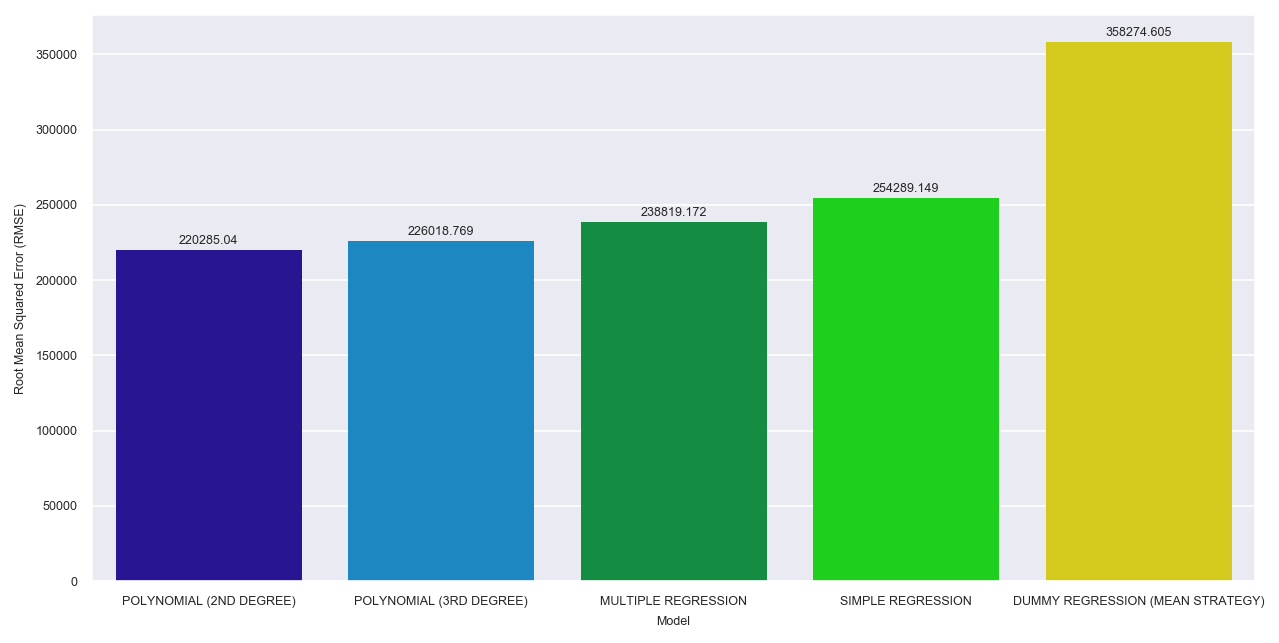

In [53]:
fig, ax = plt.subplots()
metric = 'Root Mean Squared Error (RMSE)'
results_sorted = results.sort_values(metric)
g = sns.barplot(data=results_sorted, x='Model',
                y=metric, edgecolor='None')

for i, v in enumerate(results_sorted[metric].values):
    ax.text(x=i,
            y=v+4000,
            s=str(v),
            ha='center')

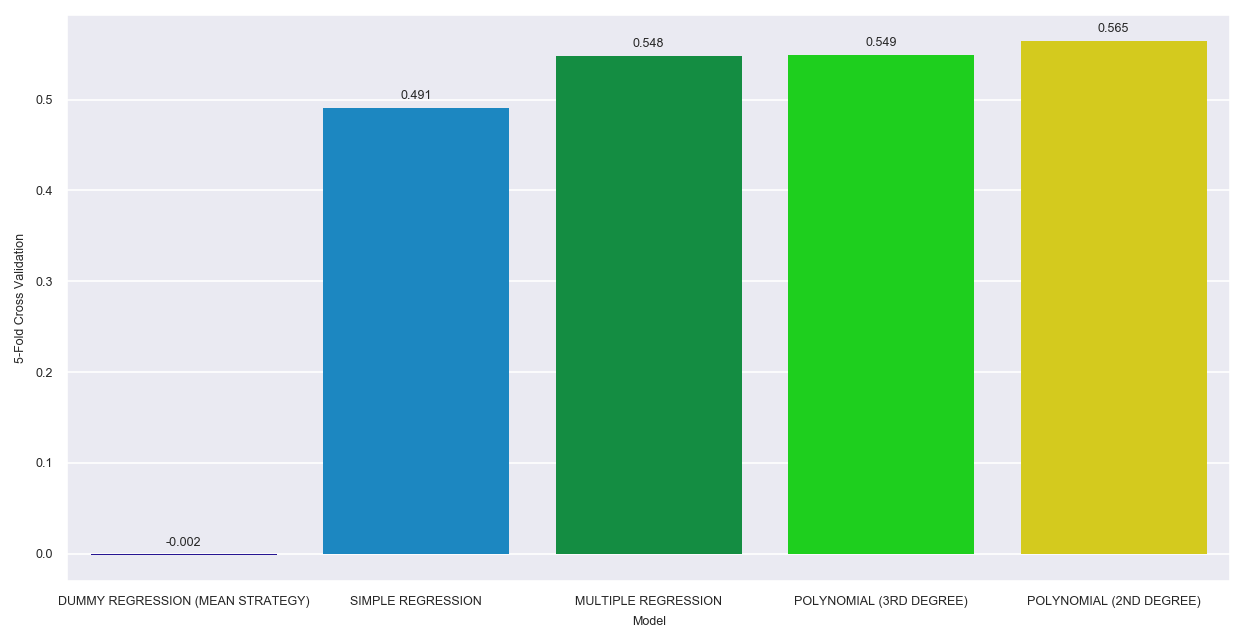

In [54]:
fig, ax1 = plt.subplots()
metric = '5-Fold Cross Validation'
results_sorted = results.sort_values(metric)
g = sns.barplot(data=results_sorted, x='Model',
                y=metric, edgecolor='None')

for i, v in enumerate(results_sorted[metric].values):
    ax1.text(x=i,
            y=v+0.01,
            s=str(v),
            ha='center')

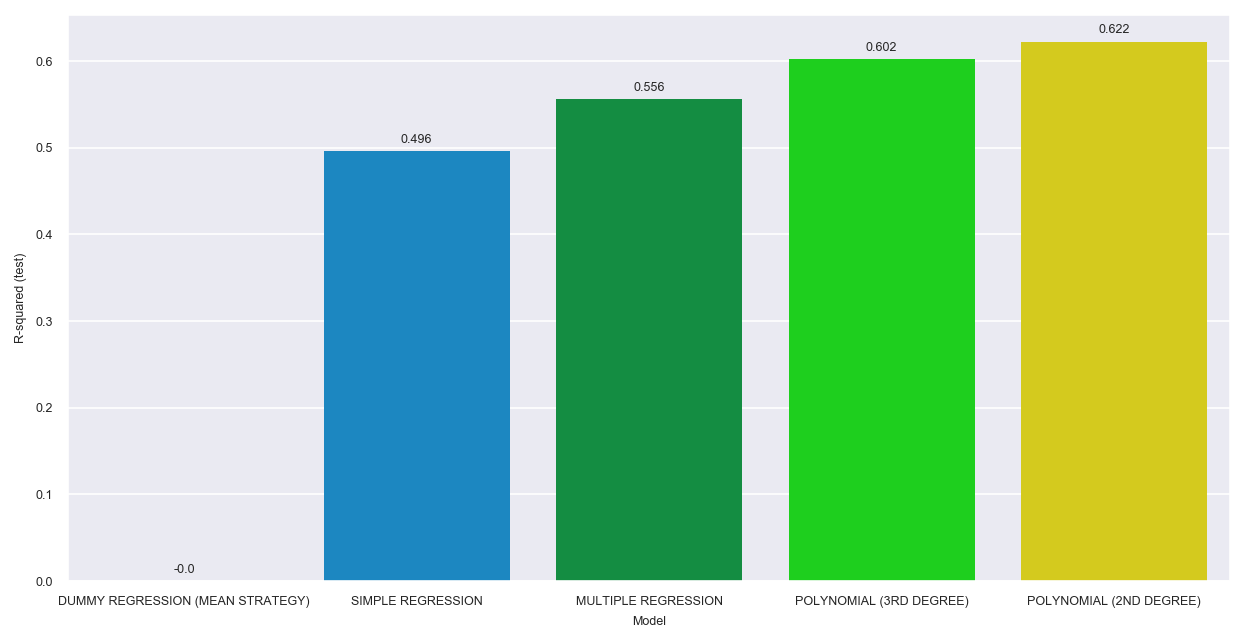

In [55]:
fig, ax1 = plt.subplots()
metric = 'R-squared (test)'
results_sorted = results.sort_values(metric)
g = sns.barplot(data=results_sorted, x='Model',
                y=metric, edgecolor='None')

for i, v in enumerate(results_sorted[metric].values):
    ax1.text(x=i,
            y=v+0.01,
            s=str(v),
            ha='center')

## Analysis

The 2nd degree polynomial regression model seems to have minimised the root mean squared error.

It has also maximised both R-Squared and the  5-Fold Cross Validation score.

It is significantly better than the stupid baseline.

The features `bedrooms`,`bathrooms`,`sqft_living`,`sqft_above`,`floors`,`grade` seem to have greater explanatory power when considered together than when a simple linear regression is done with just `sqft_living`.